In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import urllib.request
import os

In [ ]:
(ds_train_a, ds_val_a), info_a = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.1B7YZB_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.1B7YZB_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [ ]:
ds_train_a = ds_train_a.map(format_image).shuffle(1000).batch(32).prefetch(1)
ds_val_a = ds_val_a.map(format_image).batch(32).prefetch(1)


In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = 'cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, zip_path)

('cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x7c7960434810>)

('cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x7c7960434810>)

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

base_dir = 'cats_and_dogs_filtered'


In [ ]:
train_dir_b = os.path.join(base_dir, 'train')
val_dir_b = os.path.join(base_dir, 'validation')


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
ds_train_b = datagen.flow_from_directory(
    train_dir_b,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [ ]:
ds_val_b = datagen.flow_from_directory(
    val_dir_b,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
model_a = build_model()
print("\nTraining on TensorFlow Datasets (Full Cats vs Dogs)...\n")
history_a = model_a.fit(ds_train_a, validation_data=ds_val_a, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training on TensorFlow Datasets (Full Cats vs Dogs)...

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.6188 - loss: 0.7558 - val_accuracy: 0.7423 - val_loss: 0.5230
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7600 - loss: 0.4980 - val_accuracy: 0.7706 - val_loss: 0.4842
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.8013 - loss: 0.4260 - val_accuracy: 0.7739 - val_loss: 0.4902
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.8451 - loss: 0.3497 - val_accuracy: 0.7855 - val_loss: 0.5014
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8930 - loss: 0.2571 - val_accuracy: 0.7696 - val_loss: 0.5861


In [ ]:
model_b = build_model()
print("\nTraining on Filtered Google Dataset...\n")
history_b = model_b.fit(ds_train_b, validation_data=ds_val_b, epochs=5)



Training on Filtered Google Dataset...

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4993 - loss: 1.5532 - val_accuracy: 0.5700 - val_loss: 0.6723
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6152 - loss: 0.6448 - val_accuracy: 0.7020 - val_loss: 0.5970
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.7391 - loss: 0.5459 - val_accuracy: 0.7200 - val_loss: 0.5691
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8127 - loss: 0.4242 - val_accuracy: 0.7010 - val_loss: 0.5732
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8619 - loss: 0.3192 - val_accuracy: 0.7080 - val_loss: 0.5963


def plot_history(history1, history2, title1='TFDS', title2='Filtered'):
    plt.figure(figsize=(14, 5))

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np



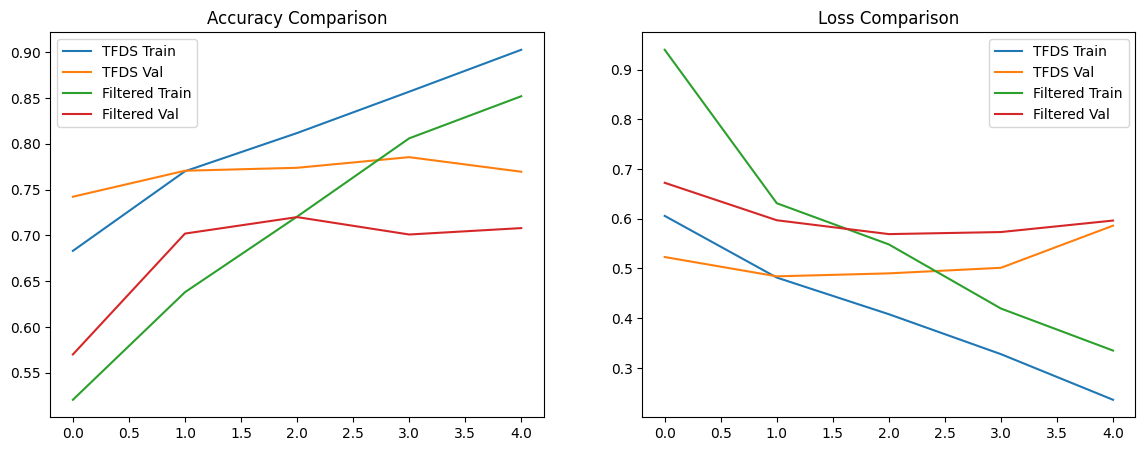

In [29]:
def plot_history(history1, history2, title1='TFDS', title2='Filtered'):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label=f'{title1} Train')
    plt.plot(history1.history['val_accuracy'], label=f'{title1} Val')
    plt.plot(history2.history['accuracy'], label=f'{title2} Train')
    plt.plot(history2.history['val_accuracy'], label=f'{title2} Val')
    plt.title('Accuracy Comparison')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label=f'{title1} Train')
    plt.plot(history1.history['val_loss'], label=f'{title1} Val')
    plt.plot(history2.history['loss'], label=f'{title2} Train')
    plt.plot(history2.history['val_loss'], label=f'{title2} Val')
    plt.title('Loss Comparison')
    plt.legend()

    plt.show()

plot_history(history_a, history_b)

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [31]:
def predict_image(img_path, model):
    # Load image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

In [35]:
def predict_image(img_path, model):
    # Load image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = 'Dog' if prediction > 0.5 else 'Cat'

    # Show
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {label} ({prediction:.2f})')
    plt.show()



In [38]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


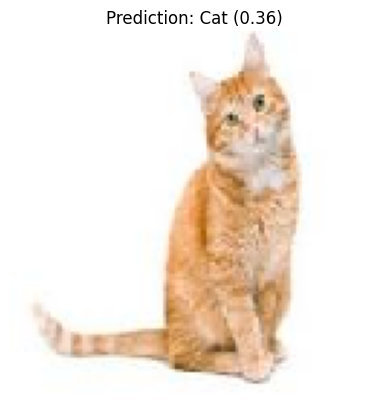

In [40]:
predict_image('/content/download (1).jpg', model_b)